# EDA of Videos

### Segment 1: Loading and Initial Exploration

This segment loads the dataset, displays the header, and provides basic information about data types, missing values, and descriptive statistics.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from prettytable import PrettyTable
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('pinoybaiting_videos_dataset.csv')

# Display the header and first 10 rows of data in a basic table format
print(df.head(5))


       videoId          Publish Date                 channelId  \
0  eUouFmegReQ  2017-01-27T03:36:04Z  UCCgVh36x3hbuRnHMpwl443Q   
1  KHYVLlfrlhQ  2017-01-29T20:17:39Z  UCCgVh36x3hbuRnHMpwl443Q   
2  S7h1GJ6Zuvk  2017-01-27T03:01:26Z  UCCgVh36x3hbuRnHMpwl443Q   
3  CKIXGJtS36c  2017-01-28T16:33:59Z  UCCgVh36x3hbuRnHMpwl443Q   
4  hFUzhd-R6GQ  2017-01-21T14:44:59Z  UCCgVh36x3hbuRnHMpwl443Q   

                                         Video Title  \
0  Roland 'Bunot' Abante - To Love Somebody (Mich...   
1  Marcelito Pomoy - Power of Love (Celine Dion) ...   
2  Xia Vigor as Taylor Swift (Your Face Sounds Fa...   
3  Jessica Sanchez & Joshua Ledet - I Knew You We...   
4  Lea Salonga VS Ruthie Henshall - I Dream A Dre...   

                                   Video Description    Channel Title  \
0  Watch the 'Roland 'Bunot' Abante - To Love Som...  Music Game News   
1  Watch the 'Marcelito Pomoy - Power of Love' co...  Music Game News   
2  Watch the Xia Vigor as Taylor Swift performa

In [2]:
# Display data types and missing values
df.info()

# Display descriptive statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42285 entries, 0 to 42284
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   videoId                 42285 non-null  object
 1   Publish Date            42285 non-null  object
 2   channelId               42285 non-null  object
 3   Video Title             42285 non-null  object
 4   Video Description       40181 non-null  object
 5   Channel Title           42285 non-null  object
 6   Video Tags              42285 non-null  object
 7   Default Audio Language  42285 non-null  object
 8   Video Views             42285 non-null  int64 
 9   Video Likes             42285 non-null  int64 
 10  Favorite Count          42285 non-null  int64 
 11  Comment Count           42285 non-null  int64 
 12  Channel Country         42285 non-null  object
 13  Query                   42285 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.5+ MB


,Video Views,Video Likes,Favorite Count,Comment Count
count,4.228500e+04,42285.000000,42285.0,42285.000000
mean,1.087470e+05,3140.130543,0.0,274.348516
std,4.639769e+05,13325.062904,0.0,1120.403259
min,0.000000e+00,0.000000,0.0,0.000000
25%,1.299000e+03,43.000000,0.0,14.000000
50%,9.322000e+03,332.000000,0.0,60.000000
75%,5.473500e+04,1974.000000,0.0,219.000000
max,1.681187e+07,472498.000000,0.0,116302.000000


### Segment 2: Text Data Exploration

This part focuses on exploring text data, calculating lengths of video titles and descriptions, and visualizing the distribution of default audio languages.

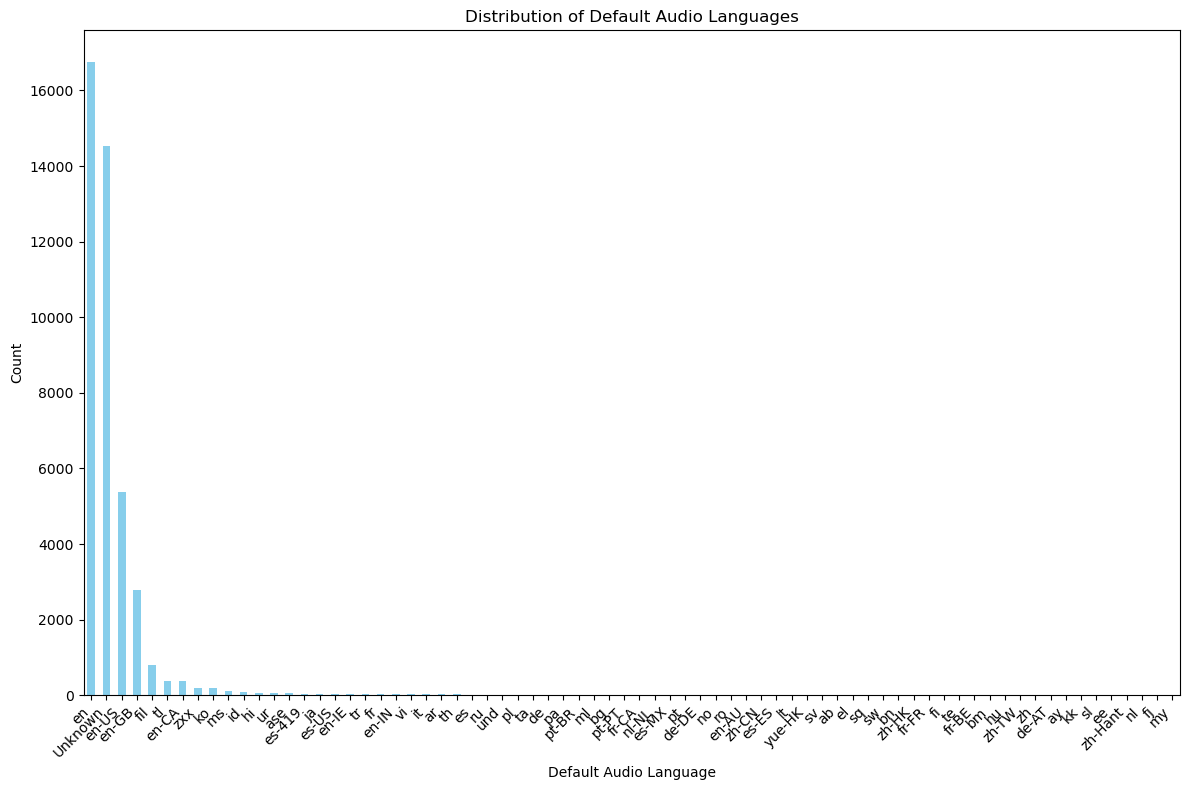

In [3]:
# Explore video titles and descriptions
df['Video Title Length'] = df['Video Title'].apply(lambda x: len(str(x)) if pd.notnull(x) and not isinstance(x, float) else 0)
df['Video Description Length'] = df['Video Description'].apply(lambda x: len(str(x)) if pd.notnull(x) and not isinstance(x, float) else 0)

# Display statistics on text lengths
df[['Video Title Length', 'Video Description Length']].describe()

# Barplot of default audio languages using matplotlib
plt.figure(figsize=(12, 8))  # Increase the size of the figure
ax = df['Default Audio Language'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Default Audio Languages')
plt.xlabel('Default Audio Language')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [4]:
# Display distribution of default audio languages
audio_language_distribution = df['Default Audio Language'].value_counts().reset_index()
audio_language_distribution.columns = ['Default Audio Language', 'Count']

# Create a PrettyTable object
table = PrettyTable()
table.field_names = ['Default Audio Language', 'Count']

# Add data to the table
for index, row in audio_language_distribution.iterrows():
    table.add_row([row['Default Audio Language'], row['Count']])

# Print the table
print("\nDistribution of Default Audio Languages:")
print(table)


Distribution of Default Audio Languages:
+------------------------+-------+
| Default Audio Language | Count |
+------------------------+-------+
|           en           | 16753 |
|        Unknown         | 14534 |
|         en-US          |  5375 |
|         en-GB          |  2778 |
|          fil           |  787  |
|           tl           |  376  |
|         en-CA          |  363  |
|          zxx           |  204  |
|           ko           |  187  |
|           ms           |  122  |
|           id           |   86  |
|           hi           |   66  |
|           ur           |   49  |
|          ase           |   49  |
|         es-419         |   43  |
|           ja           |   42  |
|         es-US          |   40  |
|         en-IE          |   39  |
|           tr           |   39  |
|           fr           |   33  |
|         en-IN          |   32  |
|           vi           |   32  |
|           it           |   20  |
|           ar           |   19  |
|           t

### Segment 3: Channel-wise Metrics and Temporal Analysis

This segment calculates average views, likes, and comments per channel, displays top channels by average views, and explores temporal trends by visualizing the number of videos published per month.

In [5]:
# Calculate average views per channel
channel_metrics = df.groupby('Channel Title')['Video Views'].mean().sort_values(ascending=False).head(10)

# Create a PrettyTable
table = PrettyTable(['Channel Title', 'Average Views'])
for channel, views in channel_metrics.items():
    table.add_row([channel, f'{views:,.1f}'])

# Print the table
print("Top Channels by Average Views:")
print(table)

Top Channels by Average Views:
+---------------------------------+---------------+
|          Channel Title          | Average Views |
+---------------------------------+---------------+
|              Domics             |  14,626,169.0 |
|           MANILA GREY           |  7,068,484.0  |
|            Joe HaTTab           |  6,834,980.5  |
|    Best Ever Food Review Show   |  6,447,555.4  |
|             CookieZ             |  5,959,365.0  |
| More Best Ever Food Review Show |  5,826,434.3  |
|           The Try Guys          |  5,653,886.3  |
|      Masterpiece of Voices      |  5,627,763.0  |
|           Aida Coleman          |  5,258,839.0  |
|           Milana Coco           |  5,212,199.5  |
+---------------------------------+---------------+


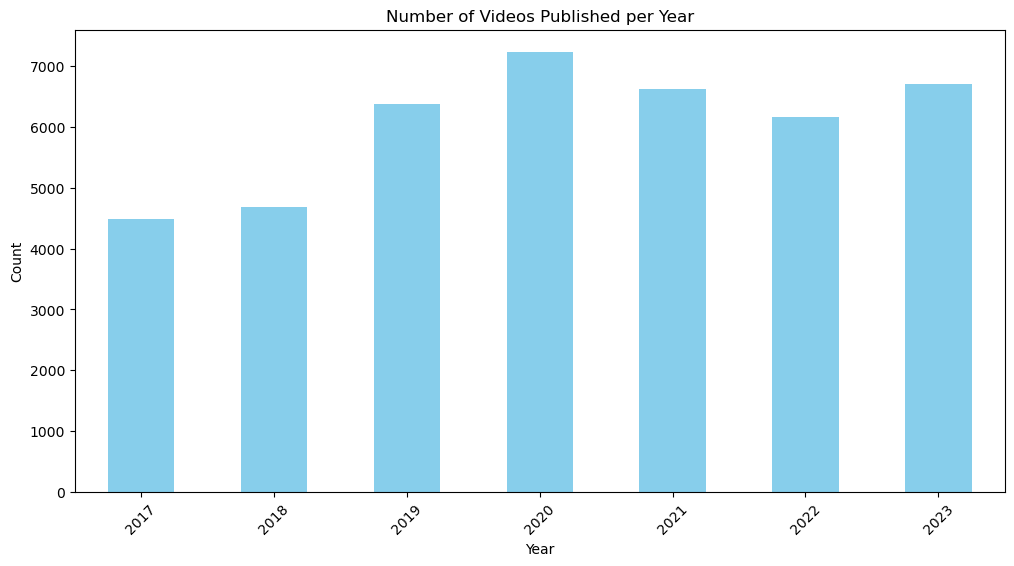

In [6]:
# Convert 'Publish Date' to datetime format
df['Publish Date'] = pd.to_datetime(df['Publish Date'])

# Extract year from the 'Publish Date' column
df['Year'] = df['Publish Date'].dt.year

# Count the number of videos published per year
year_counts = df['Year'].value_counts().sort_index()

# Barplot of videos published per year using matplotlib
plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Videos Published per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Segment 4: Topic Clustering

#### Based on Tags and Titles

Preprocess titles and tags

In [7]:
import pandas as pd
import re
import spacy
from sklearn.feature_extraction.text import CountVectorizer

# Load the English language model for spaCy
nlp = spacy.load('en_core_web_sm')

# Load the dataset (replace 'pinoybaiting_videos_dataset.csv' with your dataset file)
df = pd.read_csv('pinoybaiting_videos_dataset.csv')

# Define a function for text preprocessing
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text using spaCy
    doc = nlp(text)
    # Lemmatize the tokens and remove stopwords
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop]
    # Join the tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply the preprocessing function to the 'Video Title' and 'Video Tags' columns
df['Video Title'] = df['Video Title'].apply(preprocess_text)
df['Video Tags'] = df['Video Tags'].apply(preprocess_text)

In [8]:
# Combine tags and titles into a single text column
df['Combined Text'] = df['Video Tags'] + ' ' + df['Video Title']

# Tokenize and preprocess the combined text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Combined Text'])


Model training

In [28]:
# Apply LDA for topic modeling
best_lda_model = None
best_lda_score = float("-inf")
lda = LatentDirichletAllocation(n_components=5, random_state=42)
X_lda = lda.fit_transform(X)
score = lda.score(X)
best_lda_score = score
best_lda_model = lda

# Check if LDA model is found
if best_lda_model:
    # Create the 'Cluster' column based on LDA topic distributions
    df['Cluster'] = X_lda.argmax(axis=1)
    X_lda = best_lda_model.transform(X)
    
    # Display LDA topics
    print("LDA Topics:")
    print("-----------------------------")
    lda_topics = {}
    for i, topic in enumerate(best_lda_model.components_, start=1):
        top_words_idx = topic.argsort()[:-10-1:-1]  # Display top 10 words for each topic
        top_words = [vectorizer.get_feature_names_out()[idx] for idx in top_words_idx]
        lda_topics[f"Topic {i}"] = ', '.join(top_words)
        print(f"Topic {i}: {', '.join(top_words)}")
    print("\n")

    # Display clusters and their corresponding LDA topics
    print("Clustered LDA Topics:")
    print("------------------------------------------------")
    for cluster in range(X_lda.shape[1]):
        cluster_videos = df[df['Cluster'] == cluster]
        lda_topic_label = f"Topic {cluster + 1}"
        lda_topic_words = lda_topics.get(lda_topic_label, "Unknown")
        print(f"Cluster {cluster + 1} (LDA Topic: {lda_topic_label}): {lda_topic_words}")
        print("\n")
else:
    print("LDA model not found.")

LDA Topics:
-----------------------------
Topic 1: filipino, jollibee, couple, tagalog, philippines, try, snack, challenge, el, reaction
Topic 2: filipino, food, try, pinoy, mukbang, recipe, vlog, eat, street, family
Topic 3: philippines, philippine, travel, vlog, manila, filipina, foreigner, filipino, city, cebu
Topic 4: reaction, react, filipino, sb, wish, philippines, video, music, morissette, singer
Topic 5: filipino, japan, canada, vlog, pinoy, japanese, family, singapore, asian, vlogger


Clustered LDA Topics:
------------------------------------------------
Cluster 1 (LDA Topic: Topic 1): filipino, jollibee, couple, tagalog, philippines, try, snack, challenge, el, reaction


Cluster 2 (LDA Topic: Topic 2): filipino, food, try, pinoy, mukbang, recipe, vlog, eat, street, family


Cluster 3 (LDA Topic: Topic 3): philippines, philippine, travel, vlog, manila, filipina, foreigner, filipino, city, cebu


Cluster 4 (LDA Topic: Topic 4): reaction, react, filipino, sb, wish, philippines,

Channel Country Statistics
+-----------------+-------+
| Channel Country | Count |
+-----------------+-------+
|        US       | 19331 |
|        GB       |  5347 |
|        CA       |  3604 |
|        AU       |  2324 |
|        KR       |  1367 |
|        DE       |  908  |
|        JP       |  899  |
|        NL       |  815  |
|        IN       |  712  |
|        AE       |  684  |
|        SG       |  521  |
|        MY       |  376  |
|        NZ       |  311  |
|        FR       |  299  |
|        NO       |  280  |
|        TH       |  279  |
|        ID       |  258  |
|        DO       |  256  |
|        ES       |  248  |
|        IT       |  244  |
+-----------------+-------+


Distribution of Top 20 Channel Countries


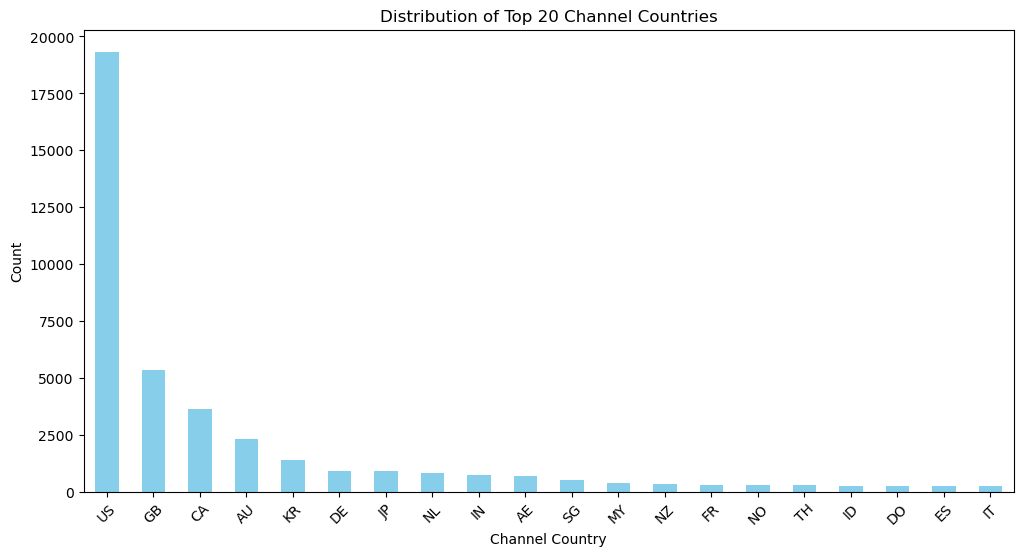

In [10]:
# Print Channel Country Statistics
print("Channel Country Statistics")
channel_country_stats = df['Channel Country'].value_counts().head(20)  # Get only the top 20 countries
channel_country_table = PrettyTable(['Channel Country', 'Count'])
for country, count in channel_country_stats.items():
    channel_country_table.add_row([country, count])
print(channel_country_table)
print("\n")

# Plot the distribution of the top 20 Channel Countries
print("Distribution of Top 20 Channel Countries")
plt.figure(figsize=(12, 6))
channel_country_stats.plot(kind='bar', color='skyblue')  # Plot only the top 20 countries
plt.title('Distribution of Top 20 Channel Countries')
plt.xlabel('Channel Country')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Data Loading and Merging

Combine category prediction chunks 1-50

In [11]:
import pandas as pd

# Initialize an empty DataFrame to store the aggregated category predictions
all_category_predictions = pd.DataFrame()

# Load each category_predictions_n.csv file and concatenate them
for i in range(1, 51):
    file_path = f'predictions/category_predictions_{i}.csv'
    temp_df = pd.read_csv(file_path)
    all_category_predictions = pd.concat([all_category_predictions, temp_df], ignore_index=True)

Save dataframes into csv files

In [27]:
all_category_predictions.to_csv('all_category_predictions_1-50.csv', index=False)

df.to_csv('pinoybaiting_videos_dataset_clustered.csv', index=False)

Merge dataframes into one

In [29]:
# Merge the datasets on videoId
merged_data = pd.merge(all_category_predictions, df, on='videoId')

# Convert 'datePublished' to datetime format and extract year and quarter
merged_data['datePublished'] = pd.to_datetime(merged_data['datePublished'])
merged_data['year'] = merged_data['datePublished'].dt.year
merged_data['quarter'] = merged_data['datePublished'].dt.quarter

## Visualizations

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

In [20]:
# Categorize 'Video Views' into ranges for easier analysis
bins = [0, 10000, 100000, 500000, 1000000, 5000000, 10000000, 50000000]
labels = ['0-10k', '10k-100k', '100k-500k', '500k-1M', '1M-5M', '5M-10M', '10M-50M']
merged_data['views_category'] = pd.cut(merged_data['Video Views'], bins=bins, labels=labels)

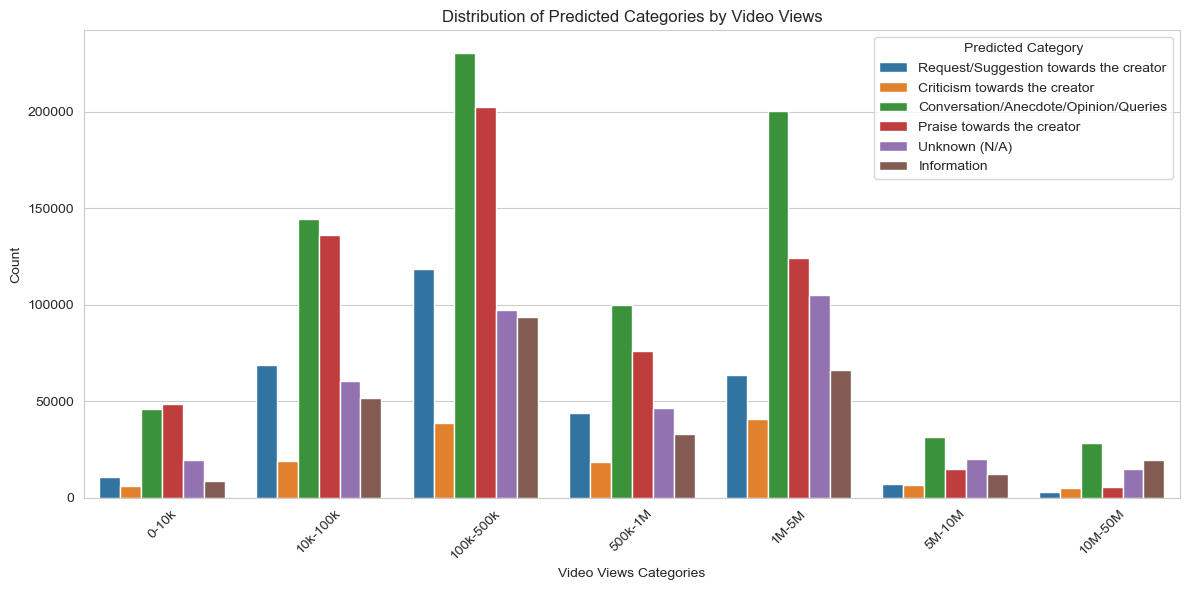

In [21]:
# Visualization 1: Category Distribution by Video Views
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data, x='views_category', hue='Predicted_Category', order=labels)
plt.title('Distribution of Predicted Categories by Video Views')
plt.xlabel('Video Views Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Predicted Category')
plt.tight_layout()
plt.show()

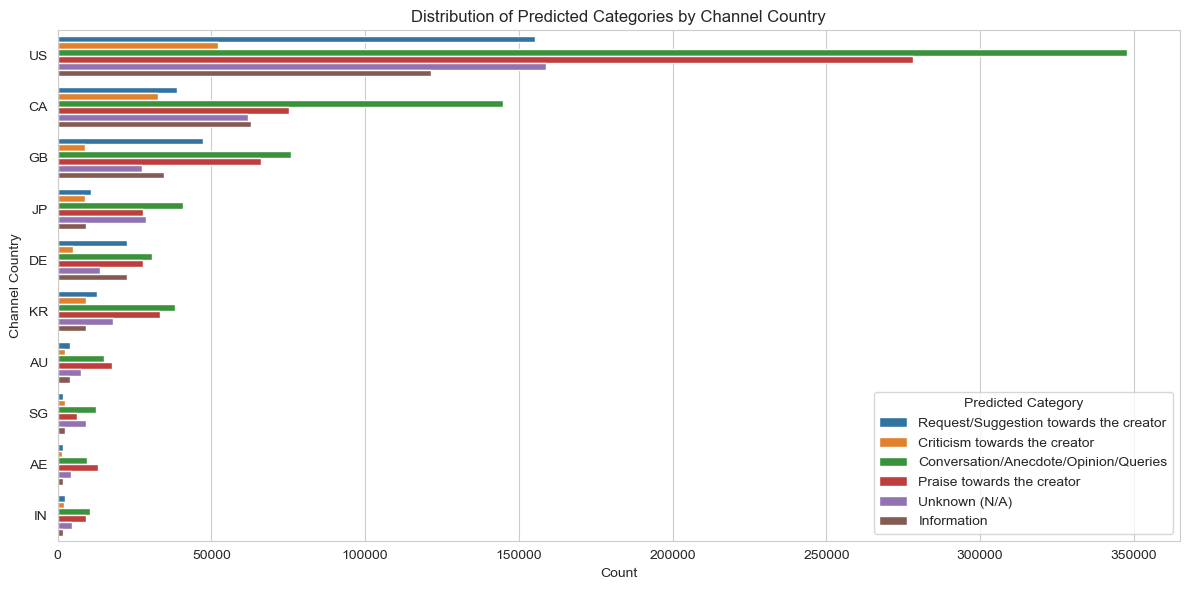

In [22]:
# Visualization 2: Category Distribution by Channel Country
plt.figure(figsize=(12, 6))
country_order = merged_data['Channel Country'].value_counts().iloc[:10].index  # Top 10 countries
sns.countplot(data=merged_data, y='Channel Country', hue='Predicted_Category', order=country_order)
plt.title('Distribution of Predicted Categories by Channel Country')
plt.xlabel('Count')
plt.ylabel('Channel Country')
plt.legend(title='Predicted Category')
plt.tight_layout()
plt.show()

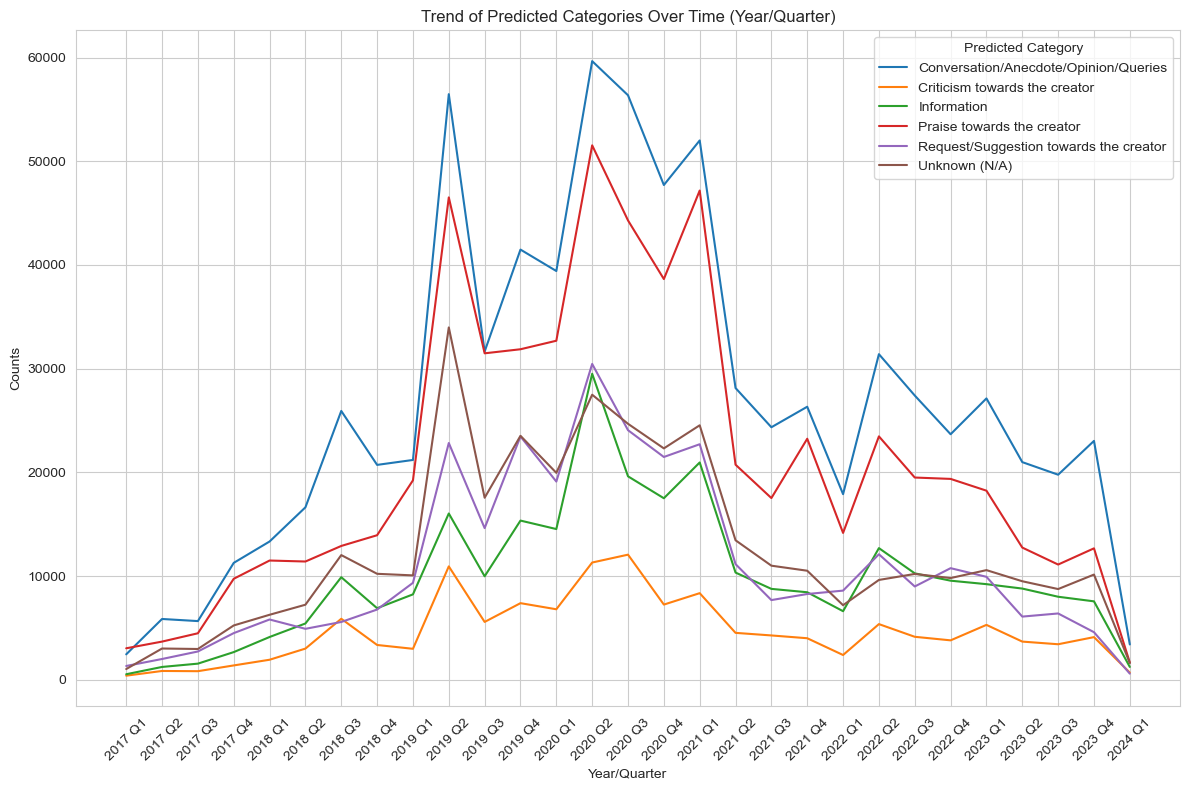

In [23]:
# Visualization 3: Trend Analysis Over Time (Year/Quarter)
time_grouped = merged_data.groupby(['year', 'quarter', 'Predicted_Category'], observed=True).size().reset_index(name='counts')

# Convert year and quarter to int and then to string while creating 'Year-Quarter' column
time_grouped['Year-Quarter'] = time_grouped['year'].astype(int).astype(str) + ' Q' + time_grouped['quarter'].astype(int).astype(str)

# Setting the figure size and style
plt.figure(figsize=(12, 8))

# Drawing a line plot for each category
for category in time_grouped['Predicted_Category'].unique():
    subset = time_grouped[time_grouped['Predicted_Category'] == category]
    sns.lineplot(data=subset, x='Year-Quarter', y='counts', label=category)

plt.title('Trend of Predicted Categories Over Time (Year/Quarter)')
plt.xlabel('Year/Quarter')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Predicted Category')
plt.tight_layout()
plt.show()

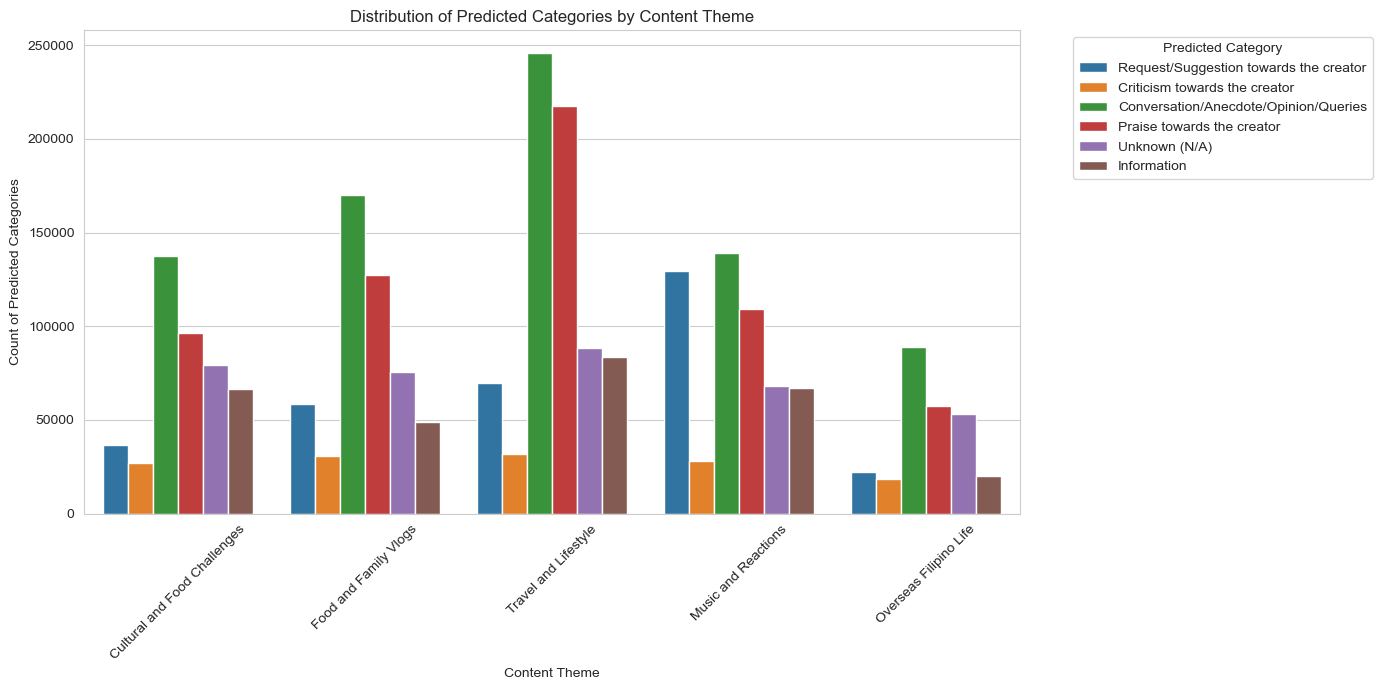

In [31]:
# Visualization 4: Distribution of Predicted Categories by Topic Cluster
cluster_names = {
    0: 'Cultural and Food Challenges',
    1: 'Food and Family Vlogs',
    2: 'Travel and Lifestyle',
    3: 'Music and Reactions',
    4: 'Overseas Filipino Life'
}

# Create a copy of the original 'Cluster' column if not already done
if 'Original_Cluster' not in merged_data.columns:
    merged_data['Original_Cluster'] = merged_data['Cluster'].copy()

# Map the original cluster numbers to names
merged_data['Cluster'] = merged_data['Original_Cluster'].map(cluster_names)

# Ensure all cluster names are included in the plot
cluster_order = list(cluster_names.values())

plt.figure(figsize=(14, 7))
ax = sns.countplot(data=merged_data, x='Cluster', hue='Predicted_Category', order=cluster_order)

plt.title('Distribution of Predicted Categories by Content Theme')
plt.xlabel('Content Theme')
plt.ylabel('Count of Predicted Categories')
plt.xticks(rotation=45)
plt.legend(title='Predicted Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()